<a href="https://colab.research.google.com/github/jay10440/full-statistical-projects/blob/main/Final_Grade_Statistical_Analysis_140_Rolston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Grade Percentage Comparison

In Spring of 2025, we were tasked to comply with the changes of uniformity to our grading policies. Namely the following:
 - Homework Grades: 30%
 - Final Exam Grades: 20 %
 - Exams: 50 %

 Some of us were happy. Some weren't. Nevertheless, we wanted to see what the success rates looked like for the students, and if there would be better success rates when we ran the numbers for comparison percentages.

 The two percentage options we will compare are the following:

 - Unit Exams: 50%, Final exam 30%, Homework 20%
 - Unit Exams: 40%, Final exam 32%, Homework 28%

In [40]:
#Installing necessary packages to do the data analysis:
install.packages(c("dplyr","ggplot2","readr","pacman"))
install.packages(c("graphics","grid","gridExtra"))
install.packages("patchwork")

#Loading up the packages:
pacman::p_load(dplyr,ggplot2,readr,graphics,grid,gridExtra,patchwork)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“packages ‘graphics’, ‘grid’ are base packages, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
#Loading in the grades:
raw_data<- read_csv("25SP_F2_MAT140_002_Grades_Original.csv")
#Keeping the final grades, and renaming it grades:
#D2L's output is ugly. Let's take out all of the grade names and
#call the final grade column just Grade:
grades<-raw_data %>%
  select(`Calculated Final Grade Numerator`) %>%
  rename(Grade = `Calculated Final Grade Numerator`)

#Just in case, clean up blanks and NAs
grades <- grades %>% filter(!is.na(Grade))

#Doublechecking the names of stuff
#head(grades)

Rows: 24 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): OrgDefinedId, End-of-Line Indicator
dbl (2): Calculated Final Grade Numerator, Calculated Final Grade Denominator

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [42]:
#Setting up and cleaning the data:
#str(grades) #determining the structure of the data
grades<- grades %>% filter(!is.na(Grade)) # gets rid of NA values
#summary(grades$Grade) #Basic statistics

In [43]:
quartiles<- summary(grades$Grade)
quartileprint<- function(x){
  print(paste("The minimum value of the grades is", quartiles["Min."]))
  print(paste("The first quartile of the grades is", quartiles["1st Qu."]))
  print(paste("The first quartile of the grades is", median(x)))
  print(paste("The first quartile of the grades is", quartiles["3rd Qu."]))
  print(paste("The first quartile of the grades is", max(x)))
}

quartileprint(grades$Grade)

[1] "The minimum value of the grades is 15.75"
[1] "The first quartile of the grades is 77.05625"
[1] "The first quartile of the grades is 84.05"
[1] "The first quartile of the grades is 91.875"
[1] "The first quartile of the grades is 98.2"


##Making a BoxPlot and Histogram

We do care about the curve of the grades. Notably, grades often follow a normal distribution (though, this is not always true. Some may follow Gamma or Beta distributions as priors which can then be "transformed" into normal distribution posteriors: this is important if alternative grading methods are performed).

Below we show a boxplot and a histogram, then some basic statistics.

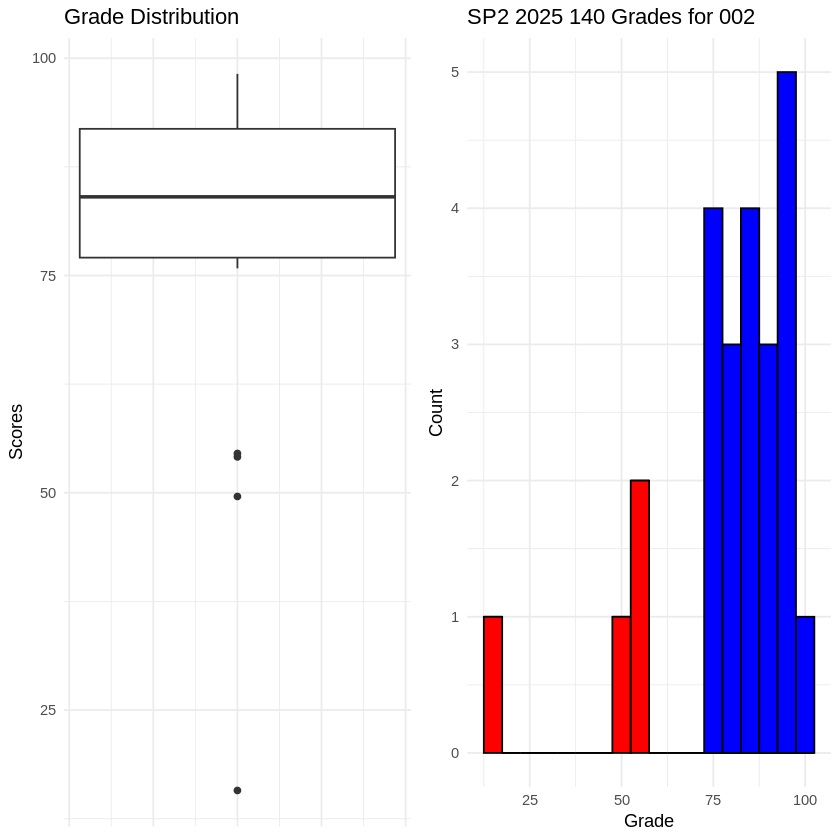

In [44]:
#Since I'm stubborn and want the grids side by side, I decided I'm going
#to use the grid extra package to make it happen.
#boxplot_grob<- grid::grid.grabExpr(
#  boxplot(grades$Grade, main="Grade Distribution", ylab="Scores")
#)

# Create the boxplot using ggplot2
boxplot_grob <- ggplot(grades, aes(y = Grade)) +
  geom_boxplot() +
  labs(title = "Grade Distribution", y = "Scores") +
  theme_minimal() +
  # Remove the x-axis labels and ticks as it's a single boxplot
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())


#Here, I'm just making it to where I can show the colors for passing and
#failing.
grades<- grades %>%
  mutate(Color = ifelse(Grade < 65, "red","blue"))

p1<-ggplot(grades, aes(x= Grade, fill=Color)) +
  geom_histogram(binwidth=5, color = "black") +
    scale_fill_identity() +
      theme_minimal() +
        labs(title = "SP2 2025 140 Grades for 002", x="Grade",y="Count")

#Side-by-side ness:
grid.arrange(boxplot_grob, p1, ncol=2)

##Basic Statistics

Below are the mean, median, variance, along with the number of students who passed and the success rates.

In [45]:
#Some data analysis.
base_statistics <- function(x){
  total_count<- length(x)
  pass_count<- sum(x>65)
  success_rate<- round(100*pass_count / total_count, 2)
  print(paste("The mean final average is", mean(x)))
  print(paste("The median final average is", median(x)))
  print(paste("The variance, skewed, is", var(x)))
  print(paste("The total number of students who passed is", pass_count, "out of", total_count))
  print(paste("The success rate for this course is", success_rate, "%"))
}

base_statistics(grades$Grade)

[1] "The mean final average is 79.296875"
[1] "The median final average is 84.05"
[1] "The variance, skewed, is 356.925886548913"
[1] "The total number of students who passed is 20 out of 24"
[1] "The success rate for this course is 83.33 %"


##An Extra Test for Normality

Just checking our basis

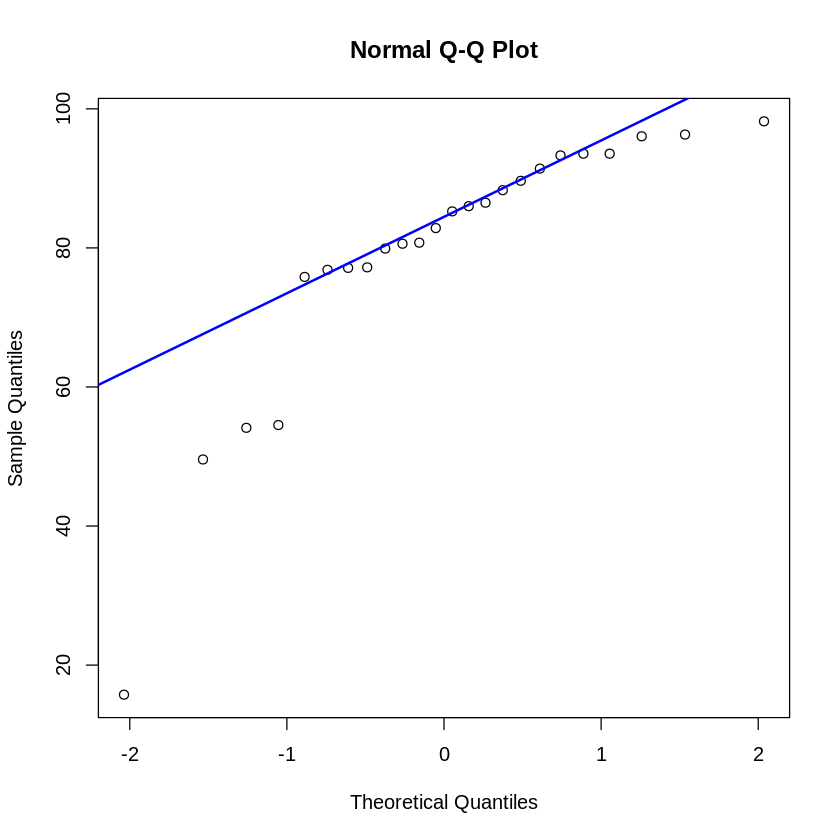

In [46]:
#Checking for normality:
qqnorm(grades$Grade)
qqline(grades$Grade, col= "blue", lwd=2)

In [47]:
#This section may be left blank depending on time constraints.

#Qualities of a beta distribution is that it has to be between 0 and 1.
#This is nice because we have a scale of 100. Divide each value by 100.

#Option A: Unit Exams: 50%, Final exam 30%, Homework 20%

In [48]:
#Loading in the grades:
raw_data1<- read_csv("25SP_F2_MAT140_002_Grades_OptionA.csv")
#Keeping the final grades, and renaming it grades:
#D2L's output is ugly. Let's take out all of the grade names and
#call the final grade column just Grade:
grades1<-raw_data1 %>%
  select(`Calculated Final Grade Numerator`) %>%
  rename(Grade = `Calculated Final Grade Numerator`)

#Just in case, clean up blanks and NAs
grades1 <- grades1 %>% filter(!is.na(Grade))

#Doublechecking the names of stuff
#head(grades)

#Setting up and cleaning the data:
#str(grades) #determining the structure of the data
grades1<- grades1 %>% filter(!is.na(Grade)) # gets rid of NA values
#summary(grades$Grade) #Basic statistics

quartiles<- summary(grades1$Grade)
quartileprint<- function(x){
  print(paste("The minimum value of the grades is", quartiles["Min."]))
  print(paste("The first quartile of the grades is", quartiles["1st Qu."]))
  print(paste("The first quartile of the grades is", median(x)))
  print(paste("The first quartile of the grades is", quartiles["3rd Qu."]))
  print(paste("The first quartile of the grades is", max(x)))
}

quartileprint(grades1$Grade)

Rows: 24 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): OrgDefinedId, End-of-Line Indicator
dbl (2): Calculated Final Grade Numerator, Calculated Final Grade Denominator

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "The minimum value of the grades is 16.25"
[1] "The first quartile of the grades is 75.325"
[1] "The first quartile of the grades is 81.425"
[1] "The first quartile of the grades is 90.5"
[1] "The first quartile of the grades is 97.3"


##BoxPlot, Histogram, and Statistics

[1] "The mean final average is 77.4479166666667"
[1] "The median final average is 81.425"
[1] "The variance, skewed, is 350.622495471014"
[1] "The total number of students who passed is 20 out of 24"
[1] "The success rate for this course is 83.33 %"


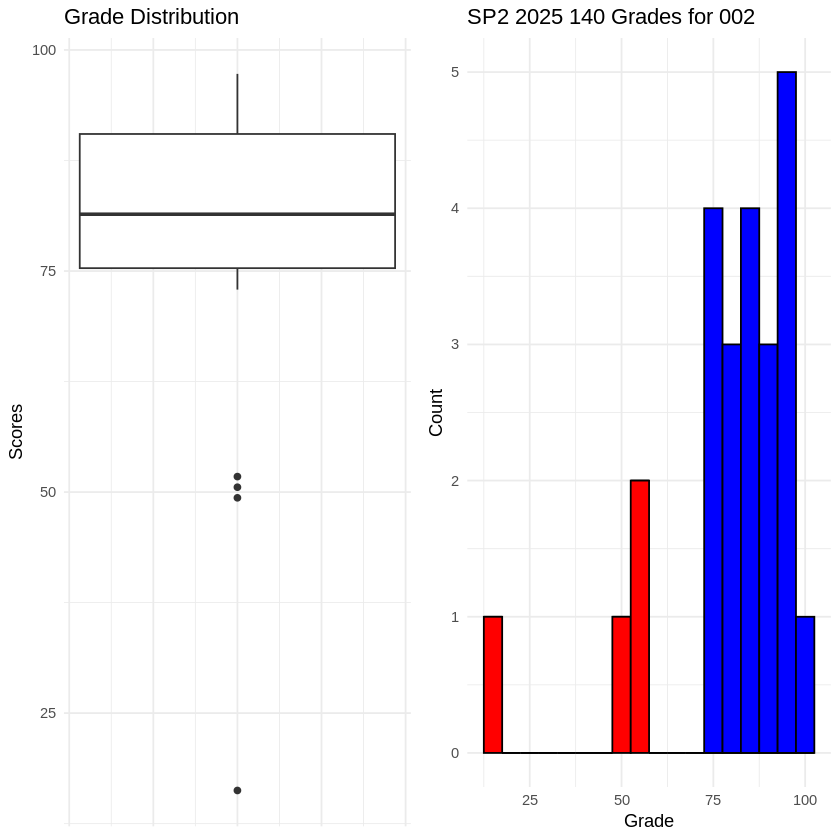

In [49]:
# Create the boxplot using ggplot2
boxplot_grob1 <- ggplot(grades1, aes(y = Grade)) +
  geom_boxplot() +
  labs(title = "Grade Distribution", y = "Scores") +
  theme_minimal() +
  # Remove the x-axis labels and ticks as it's a single boxplot
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())


#Here, I'm just making it to where I can show the colors for passing and
#failing.
grades1<- grades1 %>%
  mutate(Color = ifelse(Grade < 65, "red","blue"))

p2<-ggplot(grades1, aes(x= Grade, fill=Color)) +
  geom_histogram(binwidth=5, color = "black") +
    scale_fill_identity() +
      theme_minimal() +
        labs(title = "SP2 2025 140 Grades for 002", x="Grade",y="Count")

#Side-by-side ness:
grid.arrange(boxplot_grob1, p1, ncol=2)

#Some data analysis.
base_statistics <- function(x){
  total_count<- length(x)
  pass_count<- sum(x>65)
  success_rate<- round(100*pass_count / total_count, 2)
  print(paste("The mean final average is", mean(x)))
  print(paste("The median final average is", median(x)))
  print(paste("The variance, skewed, is", var(x)))
  print(paste("The total number of students who passed is", pass_count, "out of", total_count))
  print(paste("The success rate for this course is", success_rate, "%"))
}

base_statistics(grades1$Grade)

##Quick Test for Normality

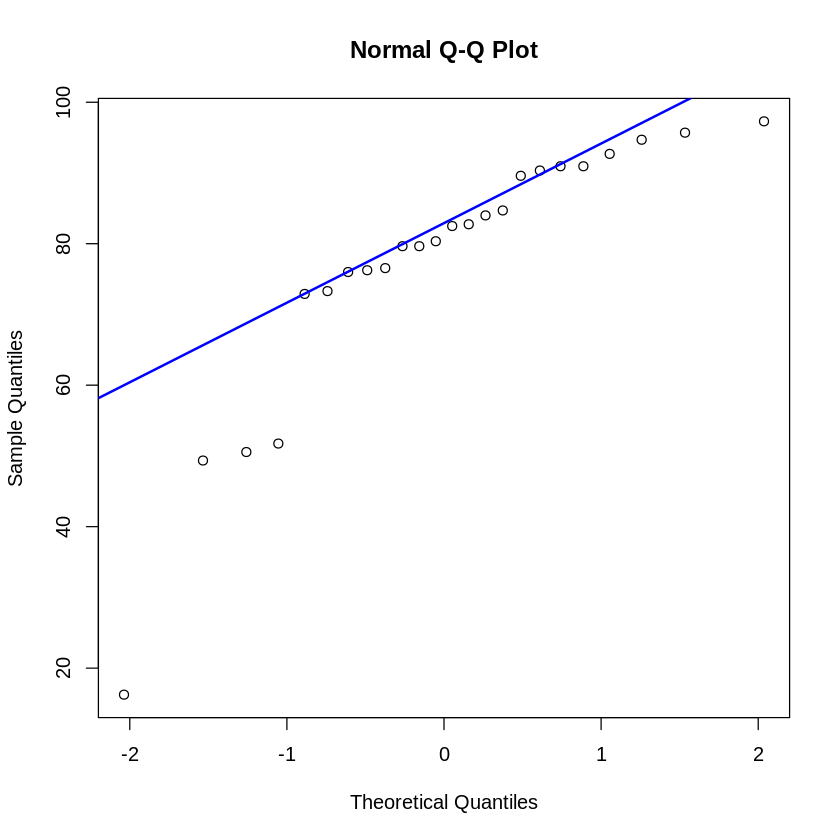

In [50]:
#Checking for normality:
qqnorm(grades1$Grade)
qqline(grades1$Grade, col= "blue", lwd=2)

## Option B: Unit Exams 40%, Final Exam 32%, Homework 28%

In [51]:
#Loading in the grades:
raw_data2<- read_csv("25SP_F2_MAT140_002_Grades_Option_B.csv")
#Keeping the final grades, and renaming it grades:
#D2L's output is ugly. Let's take out all of the grade names and
#call the final grade column just Grade:
grades2<-raw_data2 %>%
  select(`Calculated Final Grade Numerator`) %>%
  rename(Grade = `Calculated Final Grade Numerator`)

#Just in case, clean up blanks and NAs
grades2 <- grades2 %>% filter(!is.na(Grade))

#Doublechecking the names of stuff
#head(grades)

#Setting up and cleaning the data:
#str(grades) #determining the structure of the data
grades2<- grades2 %>% filter(!is.na(Grade)) # gets rid of NA values
#summary(grades$Grade) #Basic statistics

quartiles<- summary(grades2$Grade)
quartileprint<- function(x){
  print(paste("The minimum value of the grades is", quartiles["Min."]))
  print(paste("The first quartile of the grades is", quartiles["1st Qu."]))
  print(paste("The first quartile of the grades is", median(x)))
  print(paste("The first quartile of the grades is", quartiles["3rd Qu."]))
  print(paste("The first quartile of the grades is", max(x)))
}

quartileprint(grades2$Grade)

Rows: 24 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): OrgDefinedId, End-of-Line Indicator
dbl (2): Calculated Final Grade Numerator, Calculated Final Grade Denominator

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "The minimum value of the grades is 15.8"
[1] "The first quartile of the grades is 74.655"
[1] "The first quartile of the grades is 82.73"
[1] "The first quartile of the grades is 90.35"
[1] "The first quartile of the grades is 97.12"


##BoxPlot, Histogram, Statistics

[1] "The mean final average is 77.99375"
[1] "The median final average is 82.73"
[1] "The variance, skewed, is 342.118728804348"
[1] "The total number of students who passed is 20 out of 24"
[1] "The success rate for this course is 83.33 %"


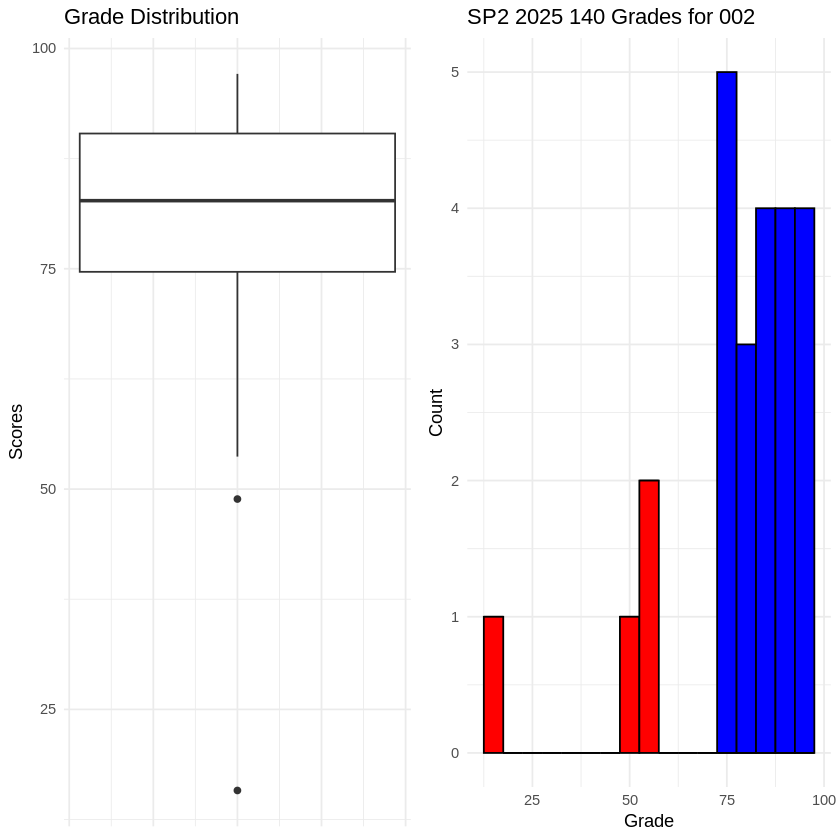

In [52]:
# Create the boxplot using ggplot2
boxplot_grob2 <- ggplot(grades2, aes(y = Grade)) +
  geom_boxplot() +
  labs(title = "Grade Distribution", y = "Scores") +
  theme_minimal() +
  # Remove the x-axis labels and ticks as it's a single boxplot
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())


#Here, I'm just making it to where I can show the colors for passing and
#failing.
grades2<- grades2 %>%
  mutate(Color = ifelse(Grade < 65, "red","blue"))

p3<-ggplot(grades2, aes(x= Grade, fill=Color)) +
  geom_histogram(binwidth=5, color = "black") +
    scale_fill_identity() +
      theme_minimal() +
        labs(title = "SP2 2025 140 Grades for 002", x="Grade",y="Count")

#Side-by-side ness:
grid.arrange(boxplot_grob2, p3, ncol=2)

#Some data analysis.
base_statistics <- function(x){
  total_count<- length(x)
  pass_count<- sum(x>65)
  success_rate<- round(100*pass_count / total_count, 2)
  print(paste("The mean final average is", mean(x)))
  print(paste("The median final average is", median(x)))
  print(paste("The variance, skewed, is", var(x)))
  print(paste("The total number of students who passed is", pass_count, "out of", total_count))
  print(paste("The success rate for this course is", success_rate, "%"))
}

base_statistics(grades2$Grade)

##Normality

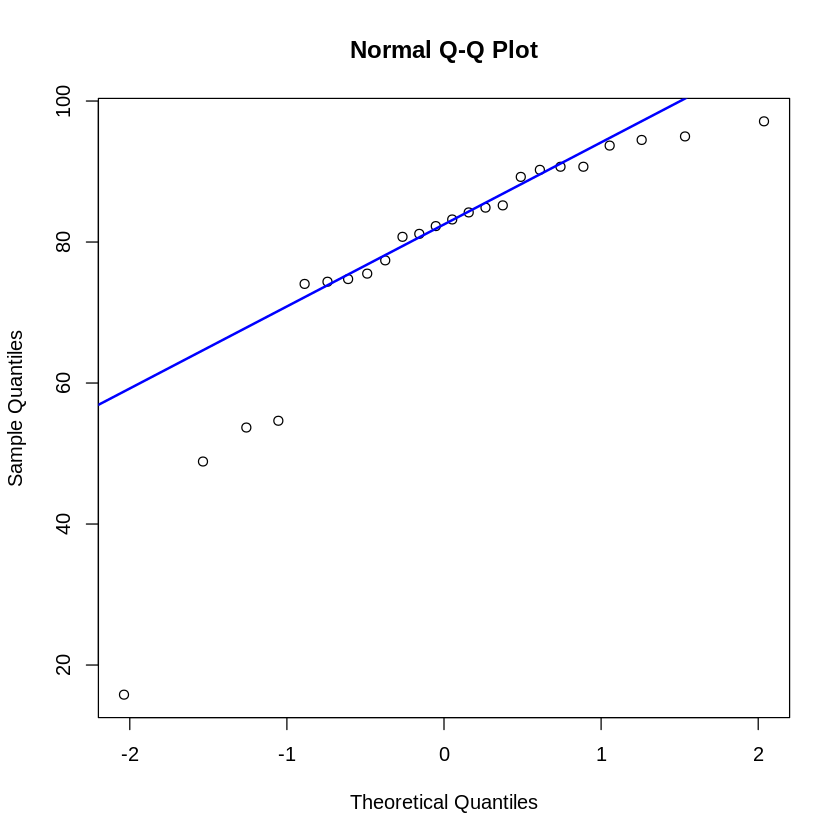

In [53]:
#Checking for normality:
qqnorm(grades2$Grade)
qqline(grades2$Grade, col= "blue", lwd=2)

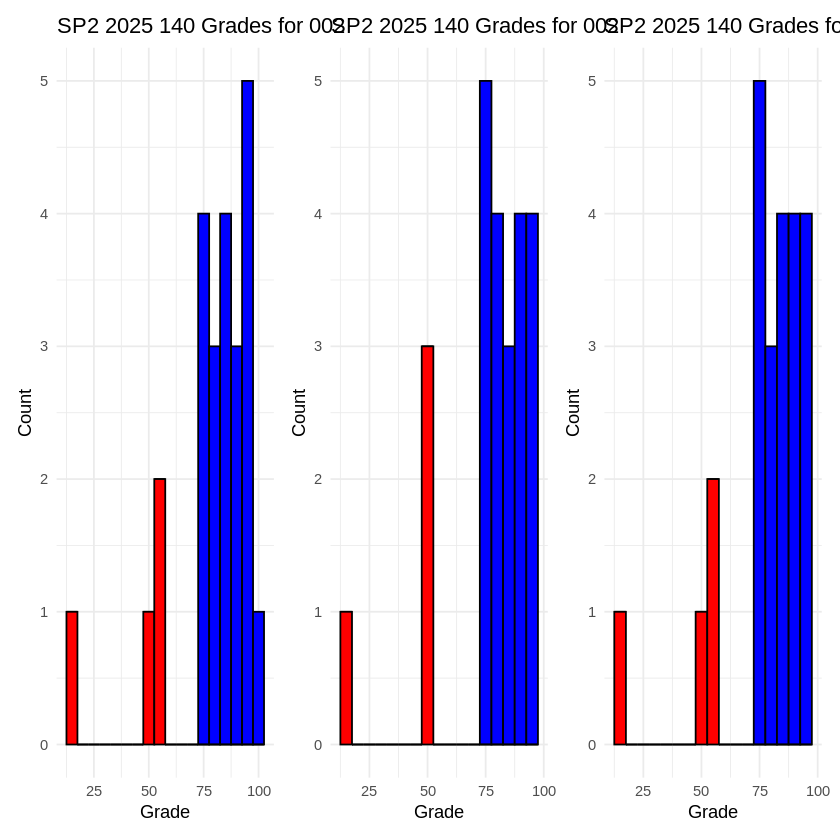

In [54]:
p1 + p2 + p3

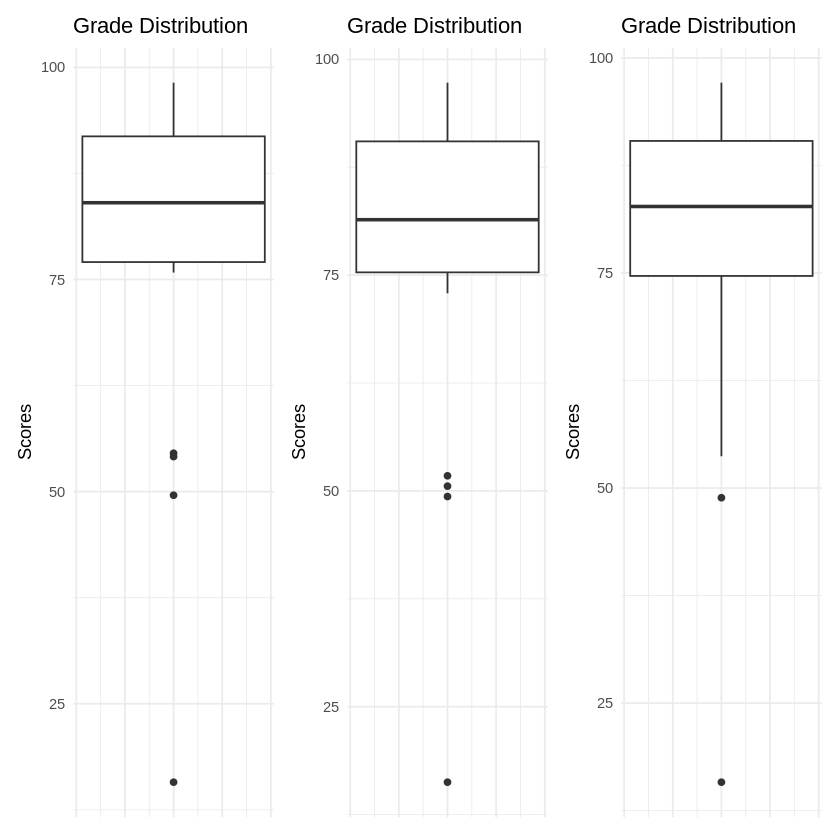

In [55]:
boxplot_grob + boxplot_grob1 + boxplot_grob2

In [56]:
base_statistics(grades$Grade)
base_statistics(grades1$Grade)
base_statistics(grades2$Grade)

[1] "The mean final average is 79.296875"
[1] "The median final average is 84.05"
[1] "The variance, skewed, is 356.925886548913"
[1] "The total number of students who passed is 20 out of 24"
[1] "The success rate for this course is 83.33 %"
[1] "The mean final average is 77.4479166666667"
[1] "The median final average is 81.425"
[1] "The variance, skewed, is 350.622495471014"
[1] "The total number of students who passed is 20 out of 24"
[1] "The success rate for this course is 83.33 %"
[1] "The mean final average is 77.99375"
[1] "The median final average is 82.73"
[1] "The variance, skewed, is 342.118728804348"
[1] "The total number of students who passed is 20 out of 24"
[1] "The success rate for this course is 83.33 %"
